<a href="https://colab.research.google.com/github/vnsupara/body-fat-analysis/blob/main/BodyFatProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Research Question: Can we use BMI to predict the percentage of bodyfat as people age?

data = pd.read_csv("/content/bodyfat.csv")
data.head()

'Downloaded From: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset/data'

'Downloaded From: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset/data'

In [ ]:
data['BMI'] = round((data['Weight']*703)/(data['Height']**2), 2)
rel_data = data[['BodyFat', 'Age', 'BMI']]
rel_data.head()

def remove_outliers_iqr(df):
    Q1 = df.select_dtypes(include=np.number).quantile(0.25)
    Q3 = df.select_dtypes(include=np.number).quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

data = remove_outliers_iqr(data)

rows, columns = data.shape
print("The dataset has " + str(rows) + " and " + str(columns) + " columns.")

numCol = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
catCol = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("The dataset has " + str(len(numCol)) + " numerical columns and " + str(len(catCol)) + " categorical columns.")

print(None in data.columns)


The dataset has 233 and 16 columns.
The dataset has 16 numerical columns and 0 categorical columns.
False


Intercept:  10.591614141269726
Coefficients:  [0.17769239]
Coefficient of Determination:  0.08072217380601188


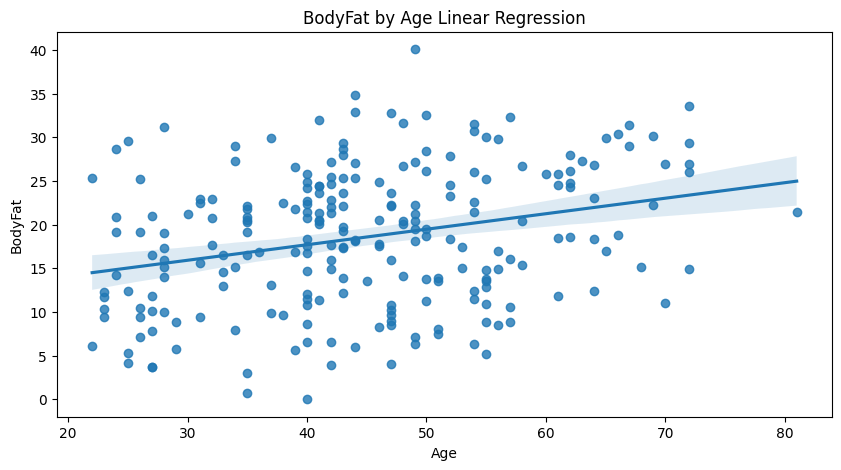

In [ ]:
# Regression Line of BodyFat by Age

fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x='Age', y='BodyFat', data=data)

x = data[['Age']]
Y = data['BodyFat']
regr = linear_model.LinearRegression()
regr.fit(x, Y)
plt.title('BodyFat by Age Linear Regression')
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print('Coefficient of Determination: ', regr.score(x, Y))


At the age, 20 years old, the predicted percentage of bodyfat is 10.463%.

As a person ages by a year, their predicted bodyfat increases by an increment .193%.

About 8.495% of the variance in percentage bodyfat can be predicted by age. Apparently, there is a weak, positive relationship between age and bodyfat.

Intercept:  -28.603418433054483
Coefficients:  [1.88300409]
Coefficient of Determination:  0.5023005496741064


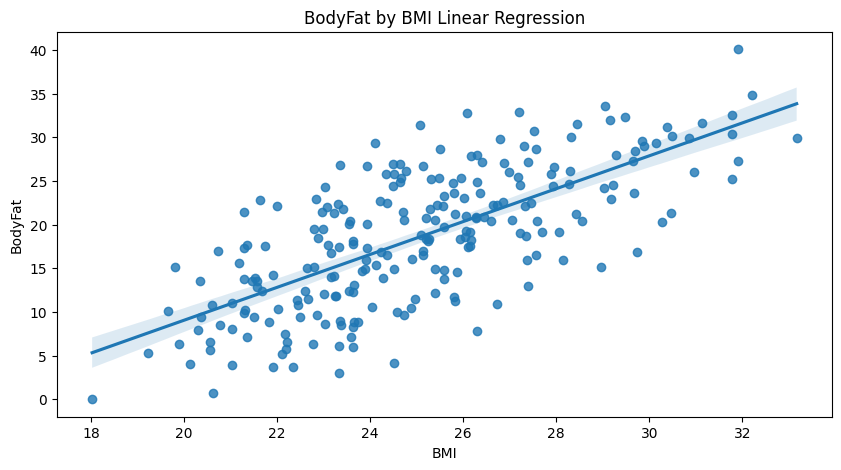

In [ ]:
# Linear Regression of BodyFat by BMI

fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x='BMI', y='BodyFat', data=data)

regr1 = linear_model.LinearRegression()
regr1.fit(data[['BMI']], data['BodyFat'])
plt.title('BodyFat by BMI Linear Regression')
print('Intercept: ', regr1.intercept_)
print('Coefficients: ', regr1.coef_)
print('Coefficient of Determination: ', regr1.score(data[['BMI']], data['BodyFat']))

It is unreasonable to interpret the intercept since having negative percentages of bodyfat is impossible in real life.

As BMI increases by 1, the percentage of BodyFat increases by 1.94693695%.

About 47.435% of the variance in Bodyfat can be accounted for by BMI.

The correlation coefficient is about .68873, which shows a relatively weak, positive relationship between BMI and BodyFat.

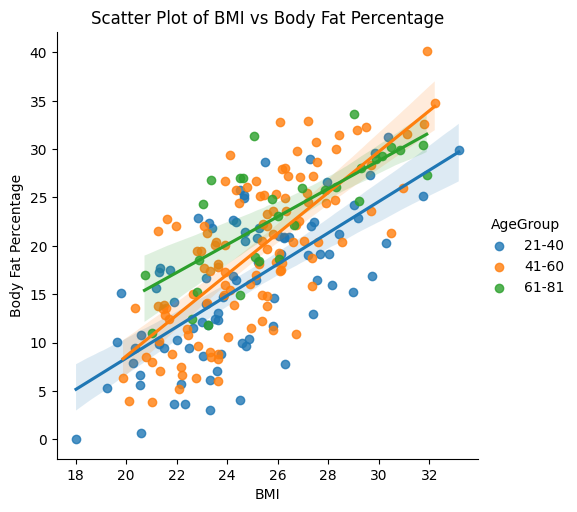

In [ ]:
# Scatter Plot with Age Hue

# Grouping Age Groups
bins = [21,41,61,81]
labels = ['21-40', '41-60', '61-81']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

sns.lmplot(data=data, x='BMI', y='BodyFat', hue = 'AgeGroup')
plt.title('Scatter Plot of BMI vs Body Fat Percentage')
plt.xlabel('BMI')
plt.ylabel('Body Fat Percentage')
plt.show()

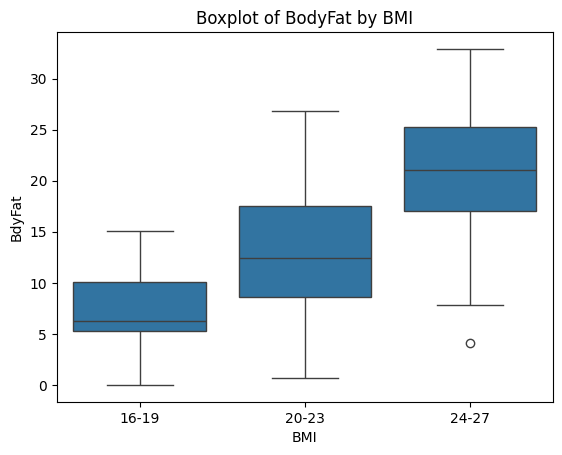

In [ ]:
# Boxplot

# Grouping BMI Ranges
bins = [16,20,24,28]
labels = ['16-19','20-23','24-27']
data['BMIGroup'] = pd.cut(data['BMI'], bins=bins, labels=labels, right=False)

sns.boxplot(data=data, x='BMIGroup', y='BodyFat')
plt.title('Boxplot of BodyFat by BMI')
plt.xlabel('BMI')
plt.ylabel('BdyFat')
plt.show()

In [ ]:
# Descriptive Statistics
print(rel_data.describe())

          BodyFat         Age         BMI
count  252.000000  252.000000  252.000000
mean    19.150794   44.884921   25.939643
std      8.368740   12.602040    9.557388
min      0.000000   22.000000   18.020000
25%     12.475000   35.750000   23.030000
50%     19.200000   43.000000   25.090000
75%     25.300000   54.000000   27.335000
max     47.500000   81.000000  165.600000


BodyFat: The mean is about 18.545%, and the median is 18.800%. It has a standard deviation of 7.845%.

Age: The mean age is 44.760 years, and the median is 43 years with a standard deviation of 12.543 years.

BMI: The mean is 25.039, and the median is 24.770 with a standard deviation of 2.953.

Since the mean and median are relatively the same for all variables, there are no outliers to remark.

In [ ]:
# Logistic Regression of BMI

logreg = LogisticRegression(max_iter=1000)
x = data[['BMI']]
y = data['BodyFat'] > 20

logreg.fit(x, y)

y_pred = logreg.predict(x)
y_pred_proba = logreg.predict_proba(x)[:, 1]

print("Coefficients:", logreg.coef_)
print("Intercept", logreg.intercept_)

Coefficients: [[0.56158533]]
Intercept [-14.19761354]


If BMI increases by 1, the chances of having a bodyfat percentage over 20% is 71.7% higher.

It is unreasonable to interpret the intercept since having a BMI of 0 means having zero body mass.

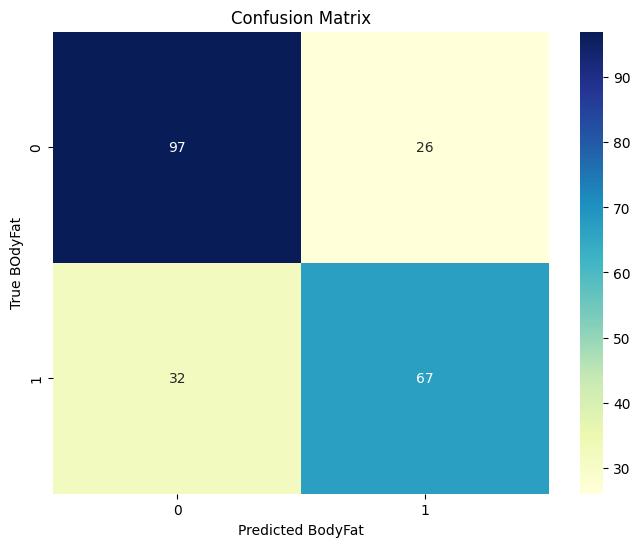

In [ ]:
# Confusion Matrix

confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.xlabel('Predicted BodyFat')
plt.ylabel('True BOdyFat')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y, y_pred))



              precision    recall  f1-score   support

       False       0.75      0.79      0.77       123
        True       0.72      0.68      0.70        99

    accuracy                           0.74       222
   macro avg       0.74      0.73      0.73       222
weighted avg       0.74      0.74      0.74       222



The model correctly classifies 74% of total samples. It does slightly better in predicting bodyfat percentages below 20%, correctly identifying 75% of Falses and 72% of Trues.


Text(0.5, 1.0, 'Residual Plot')

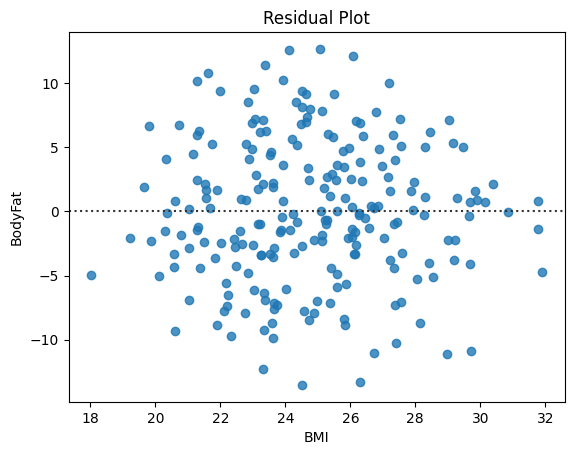

In [ ]:
# Residual PLot

sns.residplot(x=data['BMI'], y=data['BodyFat'])
plt.title('Residual Plot')

Since there is random scatter in the residual plot, a linear model is a good fit for BodyFat percentages by BMI.

In conclusion, although a positive relationship can be seen between BMI and Bodyfat percentage, it is too weak to make BMI a good predictor. The same goes for age. A weak, positive relationship can be observed, but it is not good to predict due to other confouding variables in real life.